##  Predicting presence of Heart Diseases using Machine Learning
In this work, I will discuss a project where I worked on predicting the presence or absence of heart diseases using machine learning. The algorithm I am going to use here is the Random Forest Classifier. 
### Dataset :
The dataset is available in Drivendata website, it contains a training set and a test set with  180 patients,  13 features and 90 patients, 13 features respectively.  Ground truth labels are binary classes which represent whether or not a patient has heart disease. 


In [5]:
import pandas as pd
import numpy as np
X = pd.read_csv("train_values.csv")
submission_format = pd.read_csv("submission_format.csv")
y = pd.read_csv("train_labels.csv")
Xtest = pd.read_csv("test_values.csv")
y = y["heart_disease_present"]   

### Data exploration 
In many machine learning problems, a high correlation between features poses a problem to the learning algorithm. Therefore it will be useful to check the correlations of features before building the model.
#### The correlation matrix :

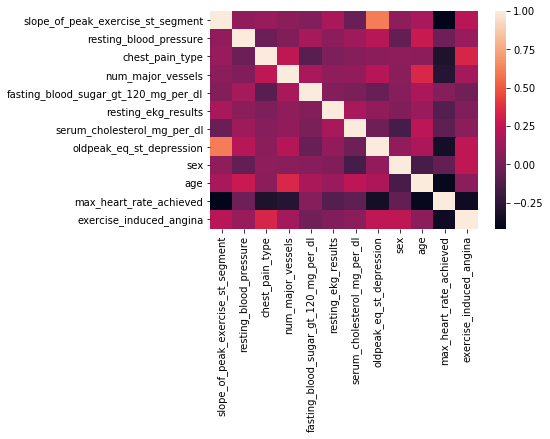

In [6]:
import seaborn as sb
sb.heatmap(X.corr())

### Feature transformation
#### Create a dummy variable :
In machine learning, any non-numerical values need to be converted to integers. In our dataset the feature ‘’Thal ‘’ is a numerical variable, therefore we have to turn it into a dummy variable with 3 values.


In [7]:
from sklearn.preprocessing import LabelEncoder
X["thal"] = LabelEncoder().fit(X["thal"]).transform(X["thal"])
X = X.loc[:,X.columns != "patient_id" ]
Xtest = Xtest.loc[:,Xtest.columns != "patient_id" ]
Xtest["thal"] = LabelEncoder().fit(Xtest["thal"]).transform(Xtest["thal"])

#### Feature binning :
In our dataset, the feature ‘’age ‘’ is a continuous variable and it will be useful to transform it into a discrete variable which contains 3 meaningful categories: 1 for age between 30 and 40, 2 for age between 40 and 50 and 3 otherwise.



In [8]:
from sklearn.preprocessing import StandardScaler
age2 = X["age"]
age1 = Xtest["age"]
for j in range(180):
    if age2[j]>= 30 and age2[j]<= 40 :
        age2[j]=1
    else:
        if age2[j]>40 and age2[j]<=50 :
            age2[j]=2
        else:
            age2[j] =3
            
for i in range(90):
    if age1[i]>= 30 and age1[i]<= 40 :
        age1[i]=1
    else:
        if age1[i]>40 and age1[i]<=50 :
            age1[i]=2
        else:
            age1[i] = 3

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: Settin

#### Feature construction:
In some machine learning problems, it is useful to manually construct new features from the dataset by aggregating or combining features. For instance, combining the variables ‘’age ‘’ and ‘’thal’’ increases in the performance of our classifier. 

In [10]:
b = X["sex"]*X["thal"]*X["fasting_blood_sugar_gt_120_mg_per_dl"]
X["new"] = b
c =X["exercise_induced_angina"]*X["resting_blood_pressure"]*X["age"]*X["fasting_blood_sugar_gt_120_mg_per_dl"]*X["sex"]
X["n"] =c
dr = X["serum_cholesterol_mg_per_dl" ]*X["resting_blood_pressure"]
X["dfe"]=dr
e =X["exercise_induced_angina"]*X["slope_of_peak_exercise_st_segment"]
X["nnn"]=e
g = X["num_major_vessels"]*X["resting_blood_pressure"]*X["age"]
X['fh'] = g
k = X["sex"]*X["slope_of_peak_exercise_st_segment" ]*X["num_major_vessels"]
X["l"]=k
vrv= X["thal"]* X["age"]
X["dfdl"]=vrv
be =Xtest["sex"]*Xtest["thal"]* Xtest["fasting_blood_sugar_gt_120_mg_per_dl"]
Xtest["new"] = be
ce =Xtest["exercise_induced_angina"]*Xtest["resting_blood_pressure"]*Xtest["age"]*Xtest["fasting_blood_sugar_gt_120_mg_per_dl"]*Xtest["sex"]
Xtest["n"] =ce
de = Xtest["serum_cholesterol_mg_per_dl" ]*Xtest["resting_blood_pressure"]
Xtest["dfe"]=de
ee =Xtest["exercise_induced_angina"]*Xtest["slope_of_peak_exercise_st_segment" ]
Xtest["nnn"]=ee
ge = Xtest["num_major_vessels"]*Xtest["resting_blood_pressure"]*Xtest["age"]
Xtest['fh'] = ge
ke = Xtest["slope_of_peak_exercise_st_segment" ]*Xtest["sex"]*Xtest["num_major_vessels"]
Xtest["l"]=ke
je= Xtest["thal"]* Xtest["age"]

#### Feature selection : 
Feature selection is an important process in all machine learning problems not only because it reduces overfitting, but it also improves the accuracy of the learning algorithm. In this example I will delete 4 irrelevant features.

In [11]:
X = X.loc[:,X.columns != "fasting_blood_sugar_gt_120_mg_per_dl" ]
X = X.loc[:,X.columns != "resting_ekg_results" ]
X = X.loc[:,X.columns != "serum_cholesterol_mg_per_dl" ]
X = X.loc[:,X.columns != "exercise_induced_angina" ]
Xtest = Xtest.loc[:,Xtest.columns != "fasting_blood_sugar_gt_120_mg_per_dl" ]
Xtest = Xtest.loc[:,Xtest.columns != "resting_ekg_results" ]
Xtest = Xtest.loc[:,Xtest.columns != "serum_cholesterol_mg_per_dl" ]
Xtest = Xtest.loc[:,Xtest.columns != "exercise_induced_angina" ]

#### Feature scaling : 
The continuous variables are at varying scales. For example, the variable ‘’ oldpeak_eq_st_depression’’ ranges from 0 to 6, whereas  ‘’ max_heart_rate_acheived ‘’ ranges from 100 to 200.  This poses a problem for machine learning algorithms. Therefore, standardizing the scale for all continuous variables can result in an increase in the performance of our classifier.


In [12]:
from sklearn.preprocessing import StandardScaler
X =  np.asarray(X)    
y = np.asarray(y)
X = StandardScaler().fit(X).transform(X)
Xtest = np.asarray(Xtest)
Xtest = StandardScaler().fit(Xtest).transform(Xtest)

### The model
In this project I will use the Random Forest classifier, with 12 trees, to classify heart disease. But, before building the model and testing it on the test set,  we need to split the data into a training set and validation set, train the model on the training set and validate it using the validation set.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 180)
rf = RandomForestClassifier(n_estimators=13, random_state=1000,min_impurity_decrease=0.000000000001) 
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=1e-12, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

### Model validation
#### The log loss:

In [14]:
from sklearn.metrics import log_loss
y_pred = rf.predict_proba(X_test)
print(log_loss(y_test, y_pred))

0.24075856299629084


#### Confusion matrix:

AxesSubplot(0.125,0.125;0.62x0.755)


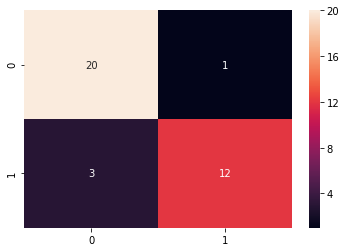

In [15]:
from sklearn.metrics import confusion_matrix
y_pred2 = rf.predict(X_test)
print(sb.heatmap(confusion_matrix(y_test, y_pred2),annot=True))

#### Precision, recall and F1-score:

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91        21
          1       0.92      0.80      0.86        15

avg / total       0.89      0.89      0.89        36

